 핸즈온 9장 비지도 학습 p.328~347

 ### **[개념 정리+코드 필사]📝**

### **9.2 가우시안 분포**

가우시안 혼합모델(GMM): 샘플이 여러개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률모델. 하나의 가우시안 분포의 샘플이 하나의 클러스터임(보통 타원형)

- 📃사이킷런 GaussianMixture(n_components=,n_init=): 사전에 가우시안 분포의 개수 k를 알아야함.
  - 데이터셋 생성과정(그래프 모형 참고)을 보면 데이터셋이 주어졌을 때 가중치 φ와 전체 분포의 파라미터 $𝛍^1$ ~ $𝛍^k$와 $Σ^1$ ~ $Σ^k$를 추정할 수 있음. GuasiianMixture 사용
  - 기댓값-최대화(EM)알고리즘 사용: gm.weights_:가중치, gm.means_:평균 행렬, gm.covariances_:분산행렬
    - k-평균과 비슷하게 클러스터 파라미터를 랜덤하게 초기화하고 수렴할때까지 반복함.(기댓값 단계(클러스터 할당)>최대화단게(클러스터 업데이트)) 소프트 클러스터 할당 사용. 각 클러스터에 속할 확률(=책임)로 가중치 적용
    - gm.converged_: 알고리즘의 수렴여부, gm.n_iter: 반복횟수
    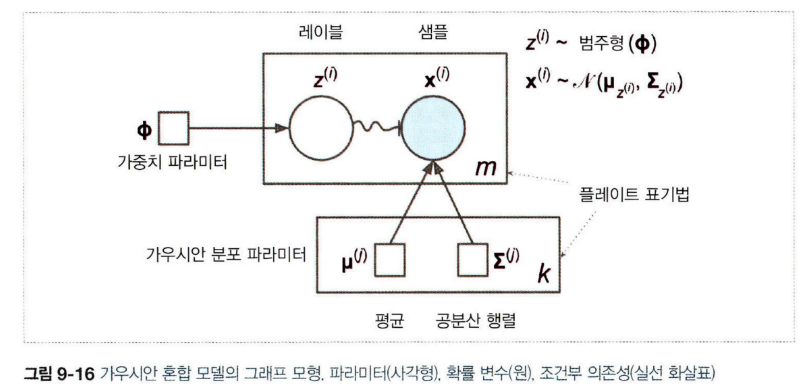

  - 예측 모델 활용: 하드군집(새 샘플을 비슷한 클러스터에 할당), 소프트군집(특정 클러스터에 속할 확률 예측)

- 가우시안 혼합 모델은 생성 모델이라 gm.sample(n)으로 새 샘플 생성가능, gm.score_samples(X)로 확률밀도함수의 로그 예측함.(높을수록 밀도 높음)

- 클러스터가 많거나 샘플이 적을 때 EM이 최적으로 수렴하기 어려움. 이땐 학습할 파라미터 개수를 제한(클러스터 모양/방향 범위 제한)
  - covariance_type: "spherical"(모두 원형), "diag"(타원형, 공분산 행렬이 대각 행렬), "tied"(모두 동일한 타원모양, 크기, 방향), "full"(기본형, 제약 없음)
  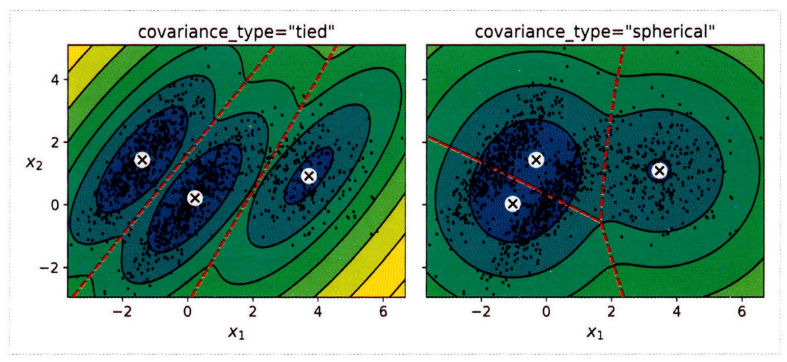

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000,noise=0.05)

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [ ]:
gm.weights_

array([0.2000613 , 0.21093698, 0.58900173])

In [ ]:
gm.means_

array([[-0.7544927 ,  0.55485744],
       [ 1.72638026, -0.07021956],
       [ 0.48882842,  0.26659921]])

In [ ]:
gm.covariances_

array([[[ 0.04991387,  0.05886522],
        [ 0.05886522,  0.08486186]],

       [[ 0.05880713,  0.06718919],
        [ 0.06718919,  0.0925583 ]],

       [[ 0.16933966, -0.10150889],
        [-0.10150889,  0.28868388]]])

In [ ]:
gm.converged_

True

In [ ]:
gm.n_iter_

15

In [ ]:
gm.predict(X)

array([0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 1, 2, 0, 2, 2, 1, 1, 1, 2, 1, 2, 0,
       2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 1, 1, 2, 2, 2, 2,
       1, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 0,
       2, 2, 1, 2, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 1, 2,
       1, 0, 0, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 0,
       2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 1, 0, 2,
       2, 2, 1, 0, 2, 2, 0, 2, 0, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 2,
       1, 0, 2, 0, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 2,
       2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 1, 1, 0, 1, 2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 0,
       2, 2, 1, 1, 0, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0,

In [ ]:
gm.predict_proba(X)

array([[9.99809324e-001, 3.93679020e-196, 1.90675724e-004],
       [2.23376248e-143, 4.05929599e-005, 9.99959407e-001],
       [2.04438608e-046, 5.21458985e-051, 1.00000000e+000],
       ...,
       [2.96911343e-113, 1.74123021e-012, 1.00000000e+000],
       [8.32909009e-035, 5.18796402e-067, 1.00000000e+000],
       [1.84015060e-192, 9.99005401e-001, 9.94598885e-004]])

In [ ]:
X_new, y_new = gm.sample(6)

In [ ]:
X_new

array([[-0.74646293,  0.53049385],
       [-0.71323043,  0.63186388],
       [-0.48847894,  0.77556404],
       [ 1.66263221, -0.20955311],
       [ 0.13674908,  0.63247064],
       [ 0.20900782,  0.28332301]])

In [ ]:
y_new

array([0, 0, 0, 1, 2, 2])

In [ ]:
gm.score_samples(X)

array([-6.39485901e-01, -1.84351210e+00, -1.65488609e+00, -1.56827035e+00,
       -1.81735908e+00, -1.53429225e+00, -1.36686513e+00, -6.66655881e-01,
       -1.84854341e+00, -7.45424303e-01, -1.66215542e-01, -1.57892296e+00,
       -1.39333280e+00, -1.53439161e+00, -1.56401840e+00, -2.92433603e-01,
       -1.51642453e-01, -4.74320548e-02, -2.26898468e+00, -6.72773168e-01,
       -1.76968019e+00, -1.52624225e+00, -1.64369812e+00, -4.19892155e-01,
       -1.90704188e+00, -6.98170342e-01, -1.87944566e+00, -1.64131899e+00,
       -1.73801010e+00, -2.01580109e+00, -3.30348710e-01, -1.41191624e+00,
       -1.92760182e+00, -1.76800888e+00, -3.02816498e+00, -1.26357428e+00,
       -1.92432238e+00, -2.02245235e+00, -5.71801318e-02, -1.01995506e+00,
       -1.35479924e+00, -1.54676366e+00, -1.52922329e+00, -1.84447593e+00,
       -1.64137013e-02, -1.75021552e+00, -1.00358617e+00, -8.28262723e-02,
       -1.92987813e+00, -1.57301822e+00, -2.05810804e+00, -1.57079899e+00,
       -1.78663726e+00, -

📘 9.2.1 가우시안 혼합을 사용한 이상치 탐지

- 이상치 탐지: 보통(정상치)와 다른 샘플을 감지. 부정거래 감지, 결함제품 감지, 훈련 전 데이터셋 이상치 제거, 데이터 정제

- 가우시안 혼합 모델에서는 밀도가 낮은 지역의 모든 샘플을 이상치로 추정. 밀도 임곗값(%)을 설정 후 밀도 낮은 지역의 샘플을 얻음. 거짓양성이 많다면 임곗값을 더 낮추고 거짓음성이 너무 많으면 임곗값을 높임.

- 특이치 탐지: 이상치로 오염되지 않은 깨끗한 데이터셋 사용


📘 9.2.2 클러스터 개수 선택하기

- k평균에서는 이너셔나 실루엣 점수를 사용하지만 가우시안 혼합에서는 지표를 사용하지 않고 AIC, BIC같은 이론적 정보 기준을 최소화하는 모델 찾음
- BIC/AIC: 클러스터가 많은 모델에 벌칙을 가하고 잘 학습하는 모델에 보상 함. BIC가 더 간단한 모델이지만 데이터에 아주 잘 맞지 않을 수 있음


✅ $BIC = log(m)p-2*log(L̂)$

✅ $AIC = 2p-2*log(L̂)$
  - m:샘플 개수, p:학습할 파라미터 개수, L̂: 가능도 함수 최댓값


>- ➕ 확률: 확률모델이 주어지면 미래 출력 x가 얼마나 그런듯한지 설명(파라미터 값Θ 알고 있음)
- ➕ 가능도: 출력 X를 알고 있을 때 파라미터 값Θ이 얼마나 그런듯한지 설명
  - pdf는 x의 함수(Θ고정), 가능도 함수는 Θ함수(x고정). 가능도함수는 확률 분포가 아님.
- ➕ 데이터셋 X가 주어졌을때 모델 파라미터에 대해 가장 그럴듯한 예측값을 찾아야하므로 x에 대한 가능도함수를 최대로 하는 값을 찾아야함. Θ의 최대 가능도 추정(MLE), 최대사후확률(MAP-사전 확률 분포 존재시) 값 이용.
  - 가능도 함수의 로그를 최대화하는, 즉 로그 가능도 함수의 합을 최대화하는 Θ를 추정하면 AIC, BIC 계산 위한 L̂ 계산가능


- covariance_type 변수에 대한 최선의 값 탐색 가능


📘9.2.3 베이즈 가우시안 혼합 모델

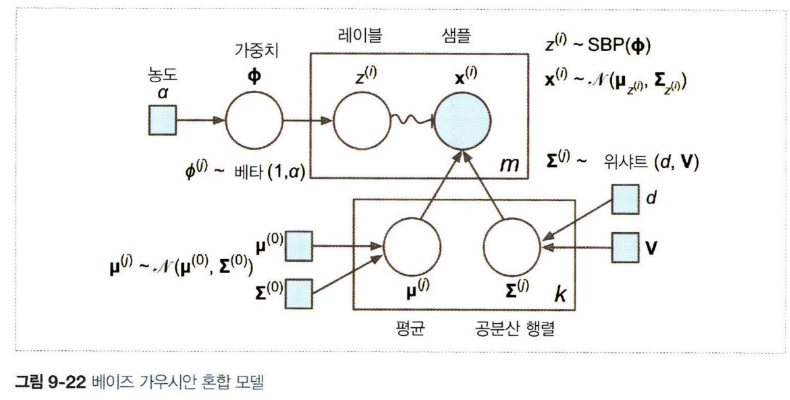

- 📃BayesianGaussianMixture: 최적의 클러스터 개수를 수동으로 찾지 않고 불필요한 클러스터 가중치를 0으로 만듦(불필요한 클러스터 제거)
  - n_components에 예상 최적 클러스터 개수보다 큰 값을 지정
  - 클러스터 파라미터, 클러스터 할당 모두 잠재 확률 변수(z)로 취급

- 베타 분포: 고정 범위 안에 놓인 값을 가진 확률 변수를 모델링할 때 사용(이땐 0~1)
- 잠재 변수 z에 대한 사전지식은 **사전 확률**(확률분포 p(z))에 인코딩됨
  - 클러스터가 적거나 풍부할 것이라는 사전믿음을 weight_concentration_prior로 조정할 수 있음. 데이터가 많을수록 사전믿음은 중요하지 않음
- 베이즈 정리: 데이터 X 관측 후, 잠재 변수에 대한 확률분포. 즉, X가 주어졌을 때 z의 조건부 확률인 **사후확률분포 p(z|X)** 계산
    $$
    p(z|X) = \frac{p(X|z)p(z)}{p(X)} = \frac{가능도*사전확률}{증거}
    $$
- 증거 p(X)를 계산하기는 어려움 > 변분 추론: 자체적인 변분 파라미터 λ를 가진 분포 패밀리 선택 후, 사후 확률의 좋은 근삿값이 되도록 파라미터 최적화. 즉, KL발산을 최소화하는 λ 찾음.
  - KL발산을 최소화하려면 ELBO를 최대화.
  - 실전의 ELBO 최대화 방법:
    1. 평균장 변분 추론-ELBO식을 계산할 수 있는 형태로 단순화
    2. 블랙박스 확률적 변분 추론(BBSVI)- 각 반복에서 몇 개의 샘플을 뽑아 λ에 대한 ELBO의 그레이디언트 추정하는 데 사용함. 경사 하강법 스텝에서 사용하므로 심층 신경망도 가능함(베이즈 딥러닝)

- 가우시안 혼합 모델은 타원형 클러스터에 잘 작동함. 다른 모양을 가진 데이터셋은 좋지 않은 결과.

  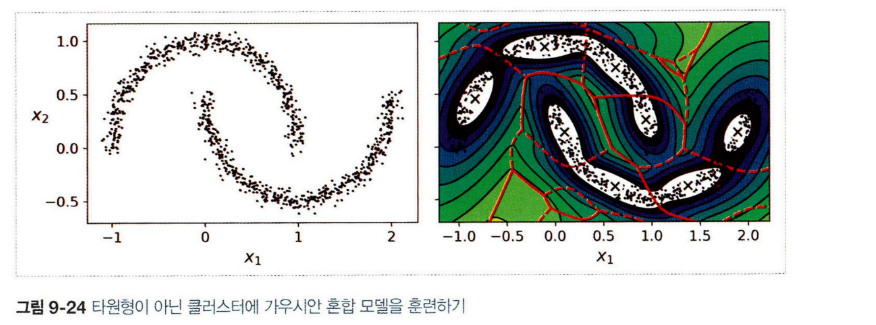



📘9.2.4 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘

- **PCA**
- **Fast-MCD**: 샘플이 혼합된 것이 아닌 하나의 가우시안 분포에서 생성되었다고 가정. 타원형을 잘 추정함
- **아이솔레이션 포르세트**: 고차원 데이터셋에서 효율적
- **LOC**: 주어진 샘플 주위의 밀도와 이웃 주위의 밀도 비교
- **one-class SVM**: 특이치 탐지. 원본 공간에서 고차원 공간의 샘플을 분리함

In [ ]:
# 9.2.1
import numpy as np
densities = gm.score_samples(X)
density_threshold = np.percentile(densities,4)
anomalies = X[densities < density_threshold]

In [ ]:
# 9.2.2
gm.bic(X)

np.float64(2758.8939120458062)

In [ ]:
gm.aic(X)

np.float64(2675.46207230311)

In [ ]:
# 9.2.3
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_,2)

/usr/local/lib/python3.11/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


array([0.18, 0.08, 0.13, 0.15, 0.08, 0.11, 0.1 , 0.16, 0.  , 0.  ])